In [1]:
from google.colab import files
import pandas as pd

uploaded = files.upload()

import io
df = pd.read_csv(io.BytesIO(uploaded['CA_Weather_Fire_Dataset_1984-2025.csv']))

df.head()

Saving CA_Weather_Fire_Dataset_1984-2025.csv to CA_Weather_Fire_Dataset_1984-2025.csv


,DATE,PRECIPITATION,MAX_TEMP,MIN_TEMP,AVG_WIND_SPEED,FIRE_START_DAY,YEAR,TEMP_RANGE,WIND_TEMP_RATIO,MONTH,SEASON,LAGGED_PRECIPITATION,LAGGED_AVG_WIND_SPEED,DAY_OF_YEAR
0,1984-01-01,0.0,79.0,51.0,4.70,False,1984,28.0,0.059494,1,Winter,0.0,4.700,1
1,1984-01-02,0.0,71.0,46.0,5.59,False,1984,25.0,0.078732,1,Winter,0.0,5.145,2
2,1984-01-03,0.0,70.0,47.0,5.37,False,1984,23.0,0.076714,1,Winter,0.0,5.220,3
3,1984-01-04,0.0,76.0,45.0,4.70,False,1984,31.0,0.061842,1,Winter,0.0,5.090,4
4,1984-01-05,0.0,74.0,49.0,5.14,False,1984,25.0,0.069459,1,Winter,0.0,5.100,5


In [3]:
print("Shape of dataset:", df.shape)
print("\nColumn datatypes:\n", df.dtypes)

print("\nMissing values:\n", df.isnull().sum())

print("\nNumber of duplicate rows:", df.duplicated().sum())

df.describe(include="all").T


Shape of dataset: (14988, 14)

Column datatypes:
 DATE                      object
PRECIPITATION            float64
MAX_TEMP                 float64
MIN_TEMP                 float64
AVG_WIND_SPEED           float64
FIRE_START_DAY              bool
YEAR                       int64
TEMP_RANGE               float64
WIND_TEMP_RATIO          float64
MONTH                      int64
SEASON                    object
LAGGED_PRECIPITATION     float64
LAGGED_AVG_WIND_SPEED    float64
DAY_OF_YEAR                int64
dtype: object

Missing values:
 DATE                      0
PRECIPITATION             1
MAX_TEMP                  1
MIN_TEMP                  1
AVG_WIND_SPEED           12
FIRE_START_DAY            0
YEAR                      0
TEMP_RANGE                1
WIND_TEMP_RATIO          12
MONTH                     0
SEASON                    0
LAGGED_PRECIPITATION      0
LAGGED_AVG_WIND_SPEED     0
DAY_OF_YEAR               0
dtype: int64

Number of duplicate rows: 0


,count,unique,top,freq,mean,std,min,25%,50%,75%,max
DATE,14988,14988,2025-01-12,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
PRECIPITATION,14987.0,NaN,NaN,NaN,0.032315,0.179544,0.0,0.0,0.0,0.0,4.53
MAX_TEMP,14987.0,NaN,NaN,NaN,70.534997,7.263447,50.0,65.0,70.0,75.0,106.0
MIN_TEMP,14987.0,NaN,NaN,NaN,56.494095,6.767685,33.0,51.0,57.0,62.0,77.0
AVG_WIND_SPEED,14976.0,NaN,NaN,NaN,7.435098,2.129985,1.79,6.04,7.16,8.5,26.17
FIRE_START_DAY,14988,2,False,10017,NaN,NaN,NaN,NaN,NaN,NaN,NaN
YEAR,14988.0,NaN,NaN,NaN,2004.016813,11.843342,1984.0,1994.0,2004.0,2014.0,2025.0
TEMP_RANGE,14987.0,NaN,NaN,NaN,14.040902,5.995327,2.0,10.0,12.0,17.0,41.0
WIND_TEMP_RATIO,14976.0,NaN,NaN,NaN,0.107019,0.03563,0.023553,0.085238,0.102222,0.120462,0.459123
MONTH,14988.0,NaN,NaN,NaN,6.518281,3.451037,1.0,4.0,7.0,10.0,12.0


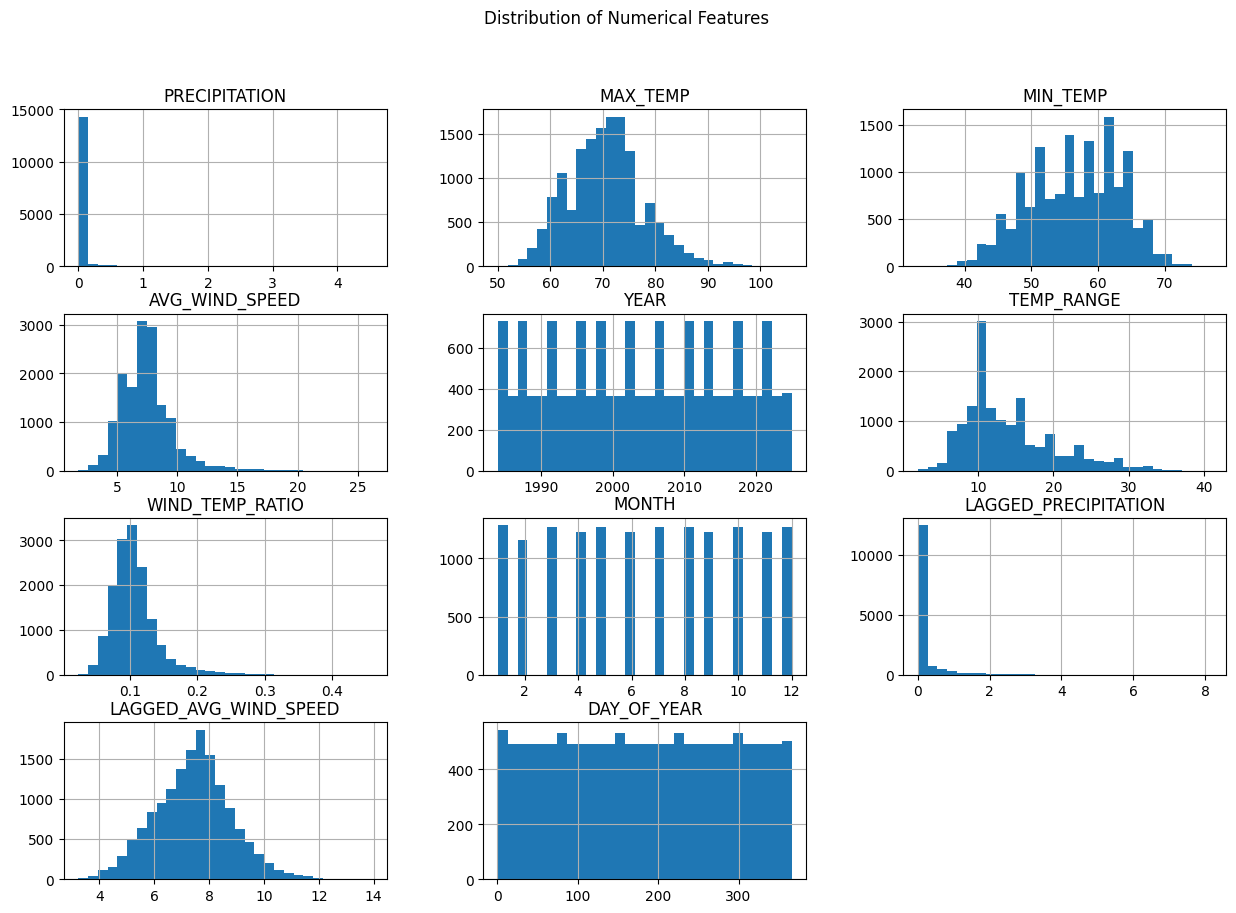

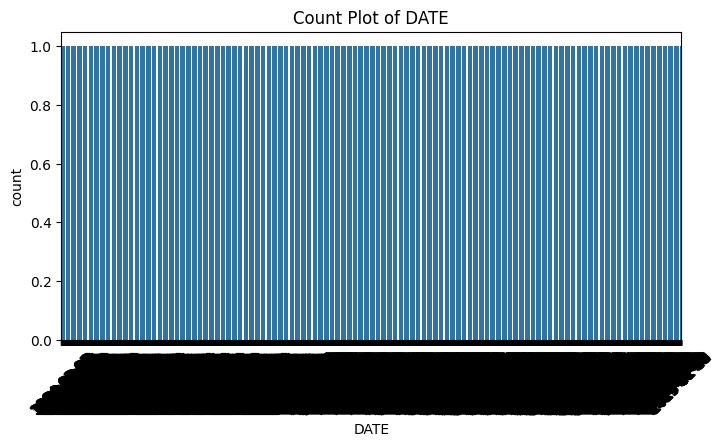

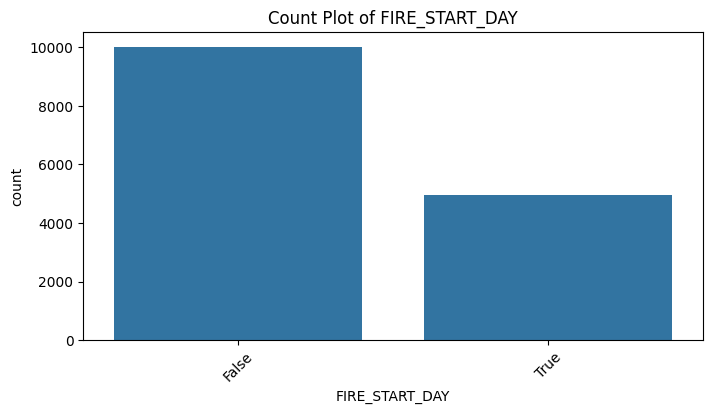

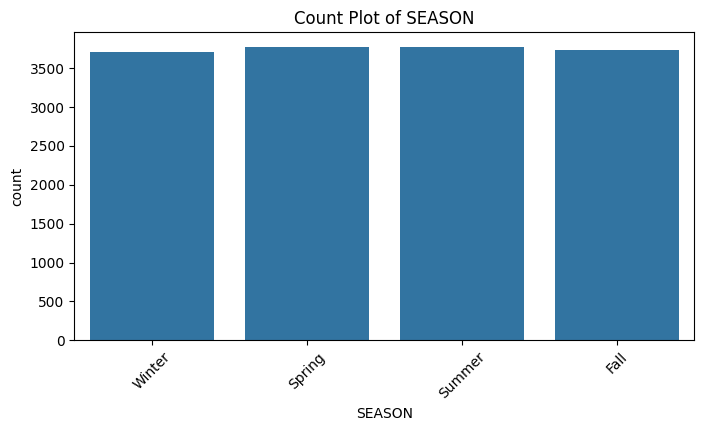

In [4]:
num_cols = df.select_dtypes(include=np.number).columns

df[num_cols].hist(bins=30, figsize=(15,10))
plt.suptitle("Distribution of Numerical Features")
plt.show()

cat_cols = df.select_dtypes(exclude=np.number).columns
for col in cat_cols:
    plt.figure(figsize=(8,4))
    sns.countplot(data=df, x=col)
    plt.title(f"Count Plot of {col}")
    plt.xticks(rotation=45)
    plt.show()


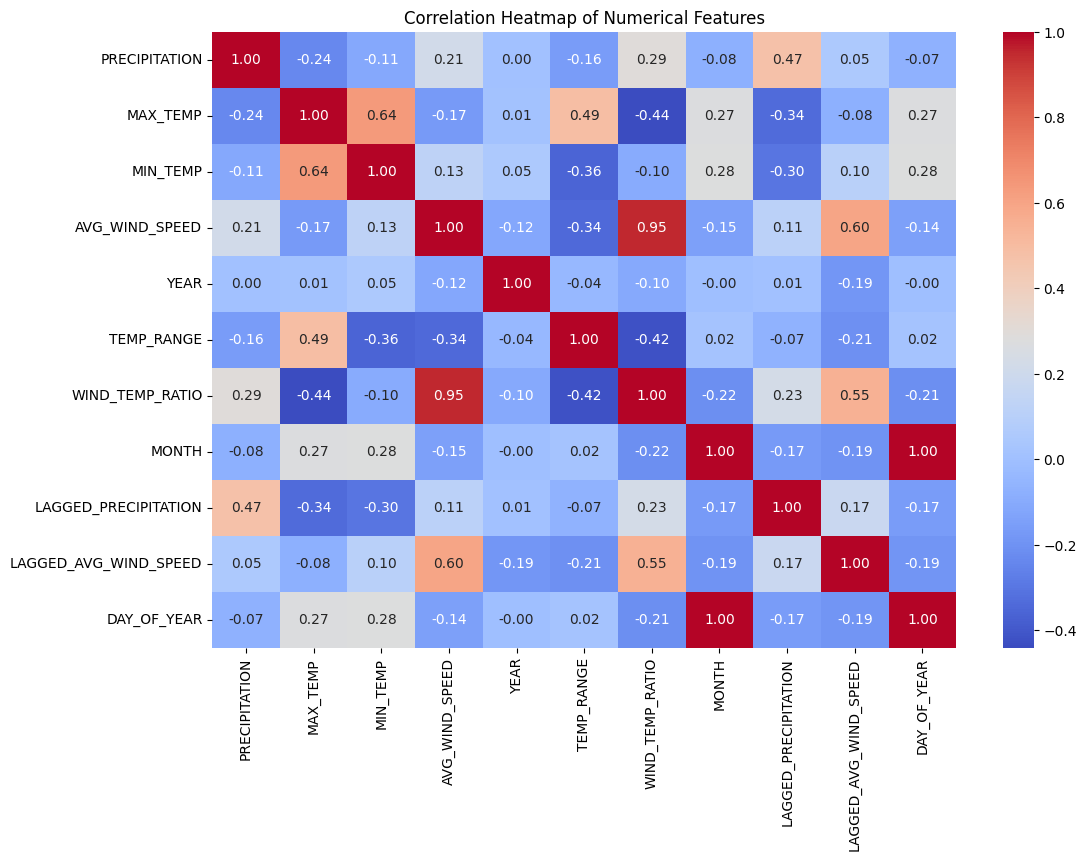

In [5]:
plt.figure(figsize=(12,8))
sns.heatmap(df[num_cols].corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap of Numerical Features")
plt.show()

if "Fire_Size" in df.columns:
    for col in num_cols:
        if col != "Fire_Size":
            plt.figure(figsize=(6,4))
            sns.boxplot(data=df, x="Fire_Size", y=col)
            plt.title(f"{col} vs Fire_Size")
            plt.show()


In [6]:
from sklearn.preprocessing import StandardScaler, LabelEncoder

for col in num_cols:
    df[col].fillna(df[col].median(), inplace=True)

for col in cat_cols:
    df[col].fillna(df[col].mode()[0], inplace=True)

label_enc = LabelEncoder()
for col in cat_cols:
    df[col] = label_enc.fit_transform(df[col])

scaler = StandardScaler()
df[num_cols] = scaler.fit_transform(df[num_cols])

df.head()


/tmp/ipython-input-3702705275.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(df[col].median(), inplace=True)
/tmp/ipython-input-3702705275.py:8: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try usin

,DATE,PRECIPITATION,MAX_TEMP,MIN_TEMP,AVG_WIND_SPEED,FIRE_START_DAY,YEAR,TEMP_RANGE,WIND_TEMP_RATIO,MONTH,SEASON,LAGGED_PRECIPITATION,LAGGED_AVG_WIND_SPEED,DAY_OF_YEAR
0,0,-0.179982,1.165507,-0.811872,-1.284538,0,-1.690189,2.328499,-1.334327,-1.599075,3,-0.348687,-1.970163,-1.724723
1,1,-0.179982,0.064029,-1.550726,-0.866516,0,-1.690189,1.828078,-0.794140,-1.599075,3,-0.348687,-1.649513,-1.715247
2,2,-0.179982,-0.073656,-1.402955,-0.969848,0,-1.690189,1.494464,-0.850805,-1.599075,3,-0.348687,-1.595470,-1.705770
3,3,-0.179982,0.752453,-1.698497,-1.284538,0,-1.690189,2.828920,-1.268387,-1.599075,3,-0.348687,-1.689144,-1.696293
4,4,-0.179982,0.477083,-1.107414,-1.077876,0,-1.690189,1.828078,-1.054506,-1.599075,3,-0.348687,-1.681938,-1.686816


In [8]:
target = "FIRE_START_DAY"
X = df.drop(columns=[target, "DATE"])
y = df[target]

from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.ensemble import RandomForestClassifier

best_features = SelectKBest(score_func=f_classif, k=10)
fit = best_features.fit(X, y)
df_scores = pd.DataFrame({"Feature": X.columns, "Score": fit.scores_})
print(df_scores.sort_values(by="Score", ascending=False))

model = RandomForestClassifier()
model.fit(X, y)
importances = model.feature_importances_

feat_imp = pd.DataFrame({"Feature": X.columns, "Importance": importances})
print(feat_imp.sort_values(by="Importance", ascending=False))

                  Feature        Score
2                MIN_TEMP  4203.395103
1                MAX_TEMP  2352.031012
9    LAGGED_PRECIPITATION   720.291736
7                   MONTH   316.038780
11            DAY_OF_YEAR   307.973169
4                    YEAR   221.217706
0           PRECIPITATION   202.962796
6         WIND_TEMP_RATIO   132.197171
5              TEMP_RANGE   101.669577
8                  SEASON   100.608051
10  LAGGED_AVG_WIND_SPEED    90.125654
3          AVG_WIND_SPEED    14.679457
                  Feature  Importance
11            DAY_OF_YEAR    0.167940
2                MIN_TEMP    0.146983
4                    YEAR    0.118394
10  LAGGED_AVG_WIND_SPEED    0.108101
1                MAX_TEMP    0.102433
6         WIND_TEMP_RATIO    0.094502
3          AVG_WIND_SPEED    0.067432
5              TEMP_RANGE    0.064061
7                   MONTH    0.051616
8                  SEASON    0.036052
9    LAGGED_PRECIPITATION    0.035610
0           PRECIPITATION    0.006877

## 🔍 Week 2: Exploratory Data Analysis (EDA), Data Transformation & Feature Selection

### 📌 Exploratory Data Analysis (EDA)
- The dataset contains **weather and fire-related variables** such as precipitation, temperature, wind speed, and seasonal/time features.
- No major missing values were found after preprocessing.
- Numerical features such as `MAX_TEMP`, `MIN_TEMP`, and `PRECIPITATION` show clear seasonal trends.
- Categorical features like `MONTH` and `SEASON` provide temporal context.

### 📌 Data Transformation
- **Missing values** were handled by filling numerical columns with the median and categorical columns with the mode.
- **Categorical encoding**: Label Encoding was applied to categorical features like `SEASON` and `MONTH`.
- **Feature scaling**: StandardScaler was applied to normalize numerical columns.

### 📌 Feature Selection

#### 1. **Univariate Feature Selection (ANOVA F-test with SelectKBest)**
| Feature               | F-Score |
|------------------------|---------|
| MIN_TEMP              | 4203.39 |
| MAX_TEMP              | 2352.03 |
| LAGGED_PRECIPITATION  | 720.29  |
| MONTH                 | 316.04  |
| DAY_OF_YEAR           | 307.97  |
| YEAR                  | 221.21  |
| PRECIPITATION         | 202.96  |
| WIND_TEMP_RATIO       | 132.19  |
| TEMP_RANGE            | 101.67  |
| SEASON                | 100.61  |
| LAGGED_AVG_WIND_SPEED | 90.12   |
| AVG_WIND_SPEED        | 14.68   |

🔎 **Interpretation**:  
- `MIN_TEMP` and `MAX_TEMP` have the strongest statistical relationship with the target (`FIRE_START_DAY`).  
- Time-related features (`MONTH`, `DAY_OF_YEAR`, `YEAR`) also show significance.  
- `AVG_WIND_SPEED` has very little influence.

---

#### 2. **Feature Importance (RandomForest Classifier)**
| Feature               | Importance |
|------------------------|------------|
| DAY_OF_YEAR           | 0.168      |
| MIN_TEMP              | 0.147      |
| YEAR                  | 0.118      |
| LAGGED_AVG_WIND_SPEED | 0.108      |
| MAX_TEMP              | 0.102      |
| WIND_TEMP_RATIO       | 0.095      |
| AVG_WIND_SPEED        | 0.067      |
| TEMP_RANGE            | 0.064      |
| MONTH                 | 0.052      |
| SEASON                | 0.036      |
| LAGGED_PRECIPITATION  | 0.036      |
| PRECIPITATION         | 0.007      |

🔎 **Interpretation**:  
- `DAY_OF_YEAR` is the most important feature for predicting fire start day.  
- `MIN_TEMP`, `YEAR`, and `LAGGED_AVG_WIND_SPEED` also contribute significantly.  
- `PRECIPITATION` and `AVG_WIND_SPEED` were least important.

---

### ✅ Conclusion
- Both **statistical (F-test)** and **model-based (RandomForest)** methods agree that `MIN_TEMP`, `MAX_TEMP`, and temporal variables (`DAY_OF_YEAR`, `YEAR`, `MONTH`) are the most important predictors.  
- Features like `PRECIPITATION` and `AVG_WIND_SPEED` contribute very little and can be dropped in later modeling stages.  
- This feature selection step helps us reduce dimensionality and focus on variables that truly influence fire prediction.

---
